In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from pathlib import Path
# from mpl_toolkits.basemap import Basemap

coords = {'vollsmose':{'left_edge_lng': 10.386036, 
                       'bottom_edge_lat': 55.400343, 
                       'right_edge_lng': 10.457705, 
                       'top_edge_lat': 55.419517},
          'bylderup':{'lllon': 8.86837, 'lllat': 54.889246, 'urlon': 9.445496, 'urlat': 55.065394}
}

bg_imgs = {#'vollsmose': "/Users/dirkhovy/Dropbox/working/lowlands/sociolinguistics/movement/data/originals/Oversigtskort_Vollsmose_2.PNG",
           #'bylderup': "/Users/dirkhovy/working/lowlands/sociolinguistics/movement/data/originals/Oversigtskort_Bylderup.PNG"
           'bylderup': '/Users/dirkhovy/Dropbox/working/lowlands/sociolinguistics/movement/data/bylderup_OSM.png',
           'vollsmose':'/Users/dirkhovy/Dropbox/working/lowlands/sociolinguistics/movement/data/vollsmose_OSM.png'
           }


In [3]:
annotation_dir = Path("../data/annotations")

In [4]:
list(annotation_dir.glob("*"))

[PosixPath('../data/annotations/V_AFA_AOF.png'),
 PosixPath('../data/annotations/V_AFA_FA.png'),
 PosixPath('../data/annotations/V_AFA_FP.png'),
 PosixPath('../data/annotations/V_AFA_HA.png'),
 PosixPath('../data/annotations/V_AFA_TP.png'),
 PosixPath('../data/annotations/V_NKI_AOF.png'),
 PosixPath('../data/annotations/V_NKI_basemap.png'),
 PosixPath('../data/annotations/V_NKI_FA.png'),
 PosixPath('../data/annotations/V_NKI_FP.png'),
 PosixPath('../data/annotations/V_NKI_HA.png')]

In [27]:
image_file = annotation_dir / "V_AFA_FA.png"
image_data = plt.imread(str(image_file))

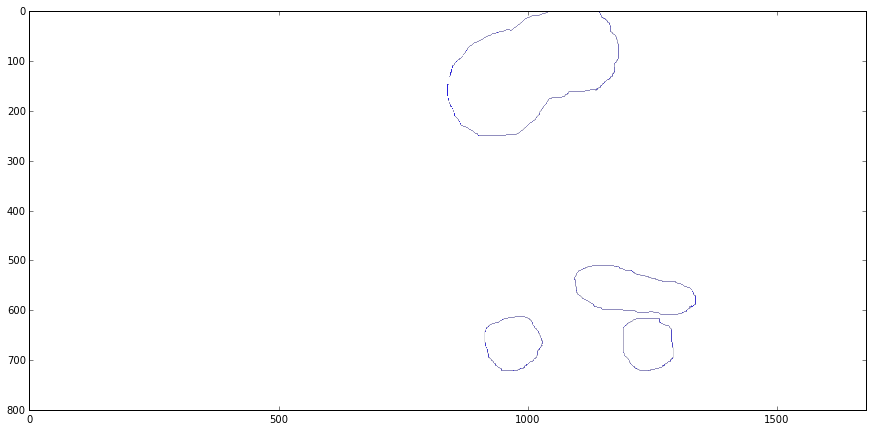

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(image_data)

[array([[ 251.5,  943. ],
       [ 251.5,  942. ],
       [ 251.5,  941. ],
       ..., 
       [ 250.5,  944. ],
       [ 251. ,  943.5],
       [ 251.5,  943. ]]), array([[  608.5,  1300. ],
       [  608.5,  1299. ],
       [  608.5,  1298. ],
       ..., 
       [  607.5,  1301. ],
       [  608. ,  1300.5],
       [  608.5,  1300. ]]), array([[  721.5,   970. ],
       [  721.5,   969. ],
       [  721.5,   968. ],
       [  721.5,   967. ],
       [  721.5,   966. ],
       [  721.5,   965. ],
       [  721.5,   964. ],
       [  721.5,   963. ],
       [  721.5,   962. ],
       [  721.5,   961. ],
       [  721.5,   960. ],
       [  721.5,   959. ],
       [  721.5,   958. ],
       [  721.5,   957. ],
       [  721.5,   956. ],
       [  721.5,   955. ],
       [  721.5,   954. ],
       [  721.5,   953. ],
       [  721.5,   952. ],
       [  721.5,   951. ],
       [  721.5,   950. ],
       [  721.5,   949. ],
       [  721.5,   948. ],
       [  721.5,   947. ],
       [ 

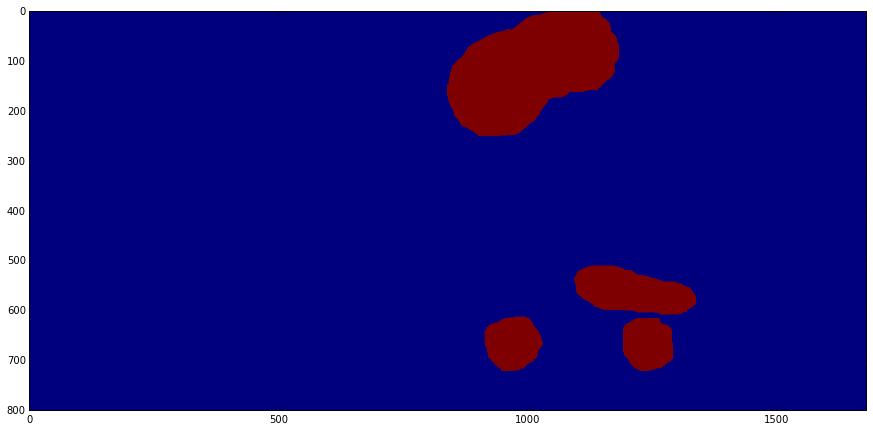

In [39]:
from skimage import color, measure
from scipy import ndimage
from skimage.morphology import binary_erosion, binary_dilation, convex_hull_image, convex_hull_object
fig, ax = plt.subplots(figsize=(15,15))



gimg = color.colorconv.rgb2grey(image_data)
bwimg = gimg > 0
bwimg = binary_dilation(bwimg, None)
bwimg = ndimage.binary_fill_holes(bwimg)
bwimg = binary_erosion(bwimg)
#bwimg = convex_hull_object(bwimg)

#plt.imshow(bwimg[:300, 600:1200])
plt.imshow(bwimg)
#co
contours = measure.find_contours(bwimg, 0.5)
print(contours)


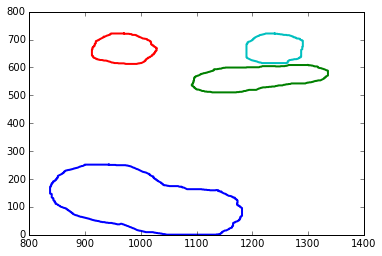

In [40]:
len(contours)
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

(363, 2)


(-100, 300)

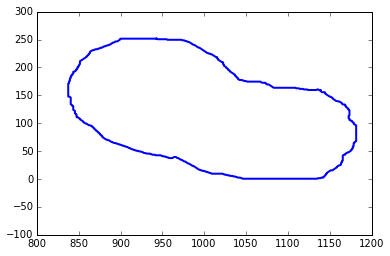

In [54]:
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
new_s = contours[0].copy()
appr_s = approximate_polygon(new_s, 0.1)
print(appr_s.shape)

fig, ax = plt.subplots()
ax.plot(appr_s[:, 1], appr_s[:, 0], linewidth=2)
ax.set_ylim(-100, 300)

## Convert from pixel coordinates to geo coordinates

```
lng = left_edge_lng + pixel_x * (right_edge_lng - left_edge_lng) 
lat = top_edge_lat - pixel_y * (top_edge_lat - bottom_edge_lat)
```


In [62]:
def convert_to_lat_lng(xy, left_edge_lng, right_edge_lng, top_edge_lat, bottom_edge_lat, map_shape):
    geo = np.zeros_like(xy)
    print(left_edge_lng, right_edge_lng, top_edge_lat, bottom_edge_lat)
    dist_lng = (right_edge_lng - left_edge_lng)
    geo[:, 0] = left_edge_lng + (xy[:, 0] / map_shape[0]) * dist_lng
    dist_lat = (top_edge_lat - bottom_edge_lat)
    geo[:, 1] = top_edge_lat - (xy[:, 1] / map_shape[1]) * dist_lat
    
    return geo
    

10.386036 10.457705 55.419517 55.400343


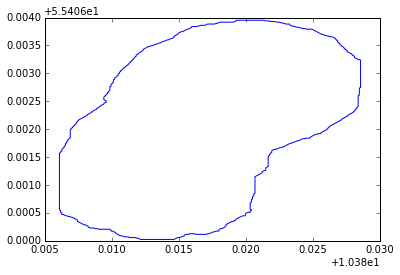

In [66]:
#geo = convert_to_lat_lng(appr_s, map_shape=bwimg.shape, **coords['vollsmose'])
#plt.plot(geo[:, 0], geo[:, 1])